# Wstęp do eksploracji danych w Pythonie

Ten notatnik pomoże Ci zapoznać się z postawowymi elementami eksploracji danych w Pythonie. Po uzupełnieniu tego notatnika powinieneś:

+ znać nazwy podstawowych bibliotek do eksploracji i wizualizacji danych,
+ umieć wczytać zbiór danych,
+ wiedzieć jak wykonać podstawowe operacje na data frame'ie
+ umieć nauczyć i przetestować klasyfikator
+ wiedzieć jak wykonać prosty wykres

## Biblioteki

Oprócz podstawowych elementów języka, do eksploracji danych wykorzystamy klika bibliotek. Podstawowe biblioteki, które będą nam potrzebne to: `matplotlib`, `pandas`, `numpy` i `sklearn`. Część z potrzebnych modułów załadowałem już poniżej: 

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, auc, roc_auc_score, make_scorer

**Zad. 3: Załaduj jeszcze dwie biblioteki: pandas z aliasem pd i numpy z aliasem np.**

In [148]:
import numpy as np
import pandas as pd

## Pandas

Najwyższy czas wczytać jakiś zbiór danych. W tym celu wykorzystamy bibliotekę, którą właśnie zaimportowałeś: pandas. Upewnij się, że ściagnięty zbiór danych znajduje się w tym samym folderze co notatnik i podążaj za komentarzami.

**Zad. 4: Wczytaj zbiór titanic do zmiennej `df`.**

In [149]:
# skorzystaj z metody read_csv w module pandas
# ponieważ nadalismy temu modułowi alias, musisz wywołać
df = pd.read_csv("titanic.csv", sep=',')
# wyszukaj w Internecie jakie parametry przyjmuje ta funkcja
# wynik wywołania przypisz do zmiennej df

Jeśli wszystko poszło dobrze, to zobaczmy jak wygląda pierwsze 10 wierszy zbioru (funkcję o takiej samej nazwie znasz z R).

**Zad. 5: Wyświetl pierwsze 10 wierszy zbioru.**

In [150]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Teraz zrobimy coś trochę trudniejszego - odfiltrujemy wybrane kolumny. Warto zajrzeć na http://pandas.pydata.org/pandas-docs/stable/10min.html, żeby zapoznać się z podstawowymi operacjami w pandas.

**Zad. 6: Usuń kolumny PassengerId, Name, Ticket, Cabin. Wynik przypisz do zmiennej `df_filtered`. Wyświetl pierwsze 10 wierszy, żeby upewnić się że operacja się udała.**

In [151]:
df_filtered = df[df.columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])]
df_filtered.head(10)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0
1,38.0,C,71.2833,0,1,female,1,1
2,26.0,S,7.9250,0,3,female,0,1
3,35.0,S,53.1000,0,1,female,1,1
4,35.0,S,8.0500,0,3,male,0,0
5,NaN,Q,8.4583,0,3,male,0,0
6,54.0,S,51.8625,0,1,male,0,0
7,2.0,S,21.0750,1,3,male,3,0
8,27.0,S,11.1333,2,3,female,0,1
9,14.0,C,30.0708,0,2,female,1,1


Zanim będziemy mogli wykorzystać jakikolwiek algorytm uczenia maszynowego z scikit-learn, musimy zrobić dwie rzeczy:
- uzupełnić (lub usunąć) brakujące wartości
- zamienić wszystkie atrybuty na liczby

Ponieważ dopiero zaczynamy pracę z pandas, wyeliminujemy wartości brakujące w najprostszy mozliwy sposób - usuniemy wiersze z wartościami pustymi

**Zad. 7: Usuń wiersze z brakującymi wartościami i przypisz wynikowego data fame'a do `df_complete`. Wyświetl pierwsze 10 wierszy i sprawdź czy zniknął piąty przykład.**

In [152]:
df_complete = df_filtered.dropna(how='any')
df_complete.head(10)
# zniknął piąty przykład

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0
1,38.0,C,71.2833,0,1,female,1,1
2,26.0,S,7.9250,0,3,female,0,1
3,35.0,S,53.1000,0,1,female,1,1
4,35.0,S,8.0500,0,3,male,0,0
6,54.0,S,51.8625,0,1,male,0,0
7,2.0,S,21.0750,1,3,male,3,0
8,27.0,S,11.1333,2,3,female,0,1
9,14.0,C,30.0708,0,2,female,1,1
10,4.0,S,16.7000,1,3,female,1,1


**Zad. 8: Zamień Sex i Embarked na kolumny liczbowe.**

In [153]:
# tu trochę pomogę...
# musimy zamienić (słowo klucz) wartości tekstowe na liczby
# zrób coś takiego dla kolumny Sex (zignoruj ostrzeżenie):

df_complete.loc[:,"Sex"].replace({"female": 0, "male": 1}, inplace=True)
df_complete.head(10)

# jeśli to się uda - wymyśl coś podobnego dla kolumny Embarked

/home/lilatee/.local/lib/python3.8/site-packages/pandas/core/series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,1,1,0
1,38.0,C,71.2833,0,1,0,1,1
2,26.0,S,7.9250,0,3,0,0,1
3,35.0,S,53.1000,0,1,0,1,1
4,35.0,S,8.0500,0,3,1,0,0
6,54.0,S,51.8625,0,1,1,0,0
7,2.0,S,21.0750,1,3,1,3,0
8,27.0,S,11.1333,2,3,0,0,1
9,14.0,C,30.0708,0,2,0,1,1
10,4.0,S,16.7000,1,3,0,1,1


In [154]:
df_complete.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [155]:
df_complete.loc[:,"Embarked"].replace({"C": 0, "S": 1, "Q": 2}, inplace=True)
df_complete.head(10)

/home/lilatee/.local/lib/python3.8/site-packages/pandas/core/series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,1,7.2500,0,3,1,1,0
1,38.0,0,71.2833,0,1,0,1,1
2,26.0,1,7.9250,0,3,0,0,1
3,35.0,1,53.1000,0,1,0,1,1
4,35.0,1,8.0500,0,3,1,0,0
6,54.0,1,51.8625,0,1,1,0,0
7,2.0,1,21.0750,1,3,1,3,0
8,27.0,1,11.1333,2,3,0,0,1
9,14.0,0,30.0708,0,2,0,1,1
10,4.0,1,16.7000,1,3,0,1,1


Pandas (i numpy na którym bazuje) potrafi dużo, dużo więcej, ale na tę chwilę to co zrobiliśmy nam wystarczy.

## Scikit-learn

Czas przejść do uczenia maszynowego. Korzystając z [dokumentacji scikit-learn](http://scikit-learn.org/stable/) oraz slajdów do zajęć, spróbuj wykonać kolejne zadania. Polecam też [tutoriale Kevina Markhama](http://blog.kaggle.com/author/kevin-markham/).

**Zad. 9: Korzystając z scikit-learn podziel `df_complete` na zbiór uczący i testowy, kolejno w proporcjach 60%-40%.**

In [156]:
# to nie jest takie trudne, bo już zaimportowaliśmy odpowiednią funkcję (spójrz na importy)
# doczytaj tylko co zwraca funkcja, której użyjesz - scikit ma trochę inne podejście do zbiorów danych niż np. caret
# postaraj się, aby ten losowy podział był powtarzalny...
# UWAGA: chcemy przewidywać wartość zmiennej Survived
X, y = df_complete[df_complete.columns.difference(['Survived'])], df_complete.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [157]:
X_train.head(10)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
156,16.0,2,7.7333,0,3,0,0
734,23.0,1,13.0000,0,2,1,0
296,23.5,0,7.2292,0,3,1,0
0,22.0,1,7.2500,0,3,1,1
881,33.0,1,7.8958,0,3,1,0
372,19.0,1,8.0500,0,3,1,0
630,80.0,1,30.0000,0,1,1,0
446,13.0,1,19.5000,1,2,0,0
346,40.0,1,13.0000,0,2,0,0
146,27.0,1,7.7958,0,3,1,0


**Zad. 10: Korzystając ze zbioru treningowego zoptymalizuj parametry klasyfikatora RandomForestClassifier. Użyj oceny krzyżowej z miarą AUC.**


In [158]:
# spójrz na slajdy do zajęć, znajdujące się tam fragmenty kodu powinny Cię naprowadzić na rozwiązanie
# uważaj... będziesz musiał zaimportować dodatkową bibliotekę
# upewnij się też, że Twój eksperyment jest powtarzalny...
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = [
    {"n_estimators": [10, 100, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [3,5,7,10]},
]
clf = GridSearchCV(RandomForestClassifier(),
                  tuned_parameters,
                  cv=5,
                  scoring = "roc_auc")
clf.fit(X_train, y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 10}


**Zad. 11: Oceń uzyskany model na zbiorze testowym.**

In [159]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("roc_auc_score: ", roc_auc_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       169
           1       0.71      0.73      0.72       116

    accuracy                           0.77       285
   macro avg       0.76      0.77      0.76       285
weighted avg       0.77      0.77      0.77       285

roc_auc_score:  0.7657875943684962


Jeśli dotarłeś do tego momentu, to gratulacje 👏

## Seaborn

Żeby coś narysować w Pythonie najczęściej korzysta się z biblioteki matplotlib i jakichś nakładek na tę bibliotekę. Matplotlib jest biblioteką względnie niskopoziomową, która mogłaby zostać porównana do podstawowego mechanizmu rysowania w R (tzw. *base plotting system*). Za pomocą matplotliba da się narysować prawie wszystko, z nakładkami jest już gorzej i dlatego często miesza się wykorzystanie różnych bibliotek.

Spróbujmy coś narysować, żeby zakończyć raport obrazkiem. Wykorzystamy w tym celu bibliotekę [seaborn](http://seaborn.pydata.org/index.html). Jeśli nie masz jej zainstalowanej musisz otworzyć terminal Anacondy (*Anaconda Prompt*) i wpisać `conda install seaborn`.

In [160]:
# najpierw odrobina magii
# jeśli chcemy żeby wykresy rysowały nam się w raporcie to musimy wykonać instrukcję
%matplotlib inline

In [161]:
# dodatkowo zaimportujmy przydatne biblioteki i ustawmy domyślny styl wykresów
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Zad. 12: Skorzystaj z `violinplot` żeby porównać ceny biletów (Fare) dla różnych klas (Pclass). Jako palety kolorów użyj jednej z palet z [ColorBrewera](http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=3)**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

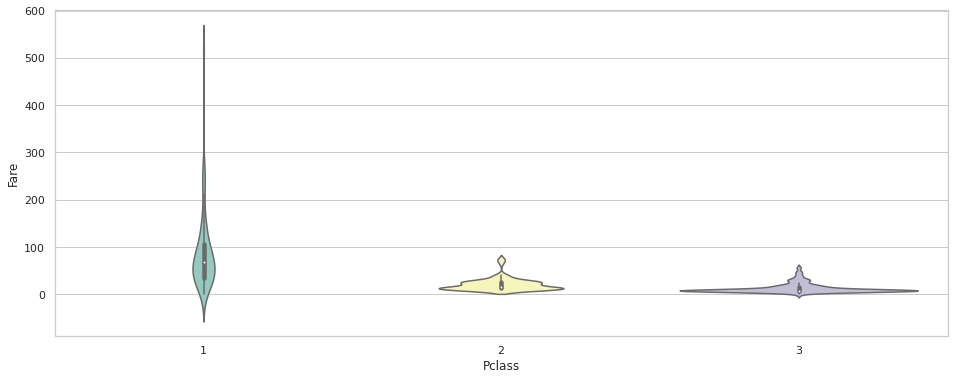

In [162]:
plt.figure(figsize=(16,6))
sns.violinplot(x="Pclass", y="Fare", data=df_complete, palette="Set3")

## Plotnine

Sprawdź co pamiętasz z ggplota! Narysuj wykres przeżywalności mężczyzn i kobiet (`Sex`) z podziałem na typy biletów (`Pclass`)

In [163]:
df_temp = df.copy()
df_temp.loc[:,"Survived"].replace({0: "Not survived", 1:"Survived"}, inplace=True)
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


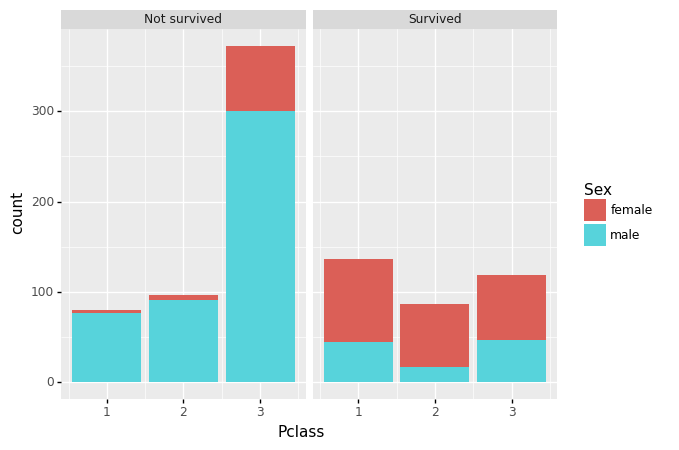

<ggplot: (8767454251867)>

In [164]:
from plotnine import *
from plotnine.data import *

# ggplot(mpg) + geom_bar(aes(x='class', fill='drv'))
(ggplot(df_temp, aes(x="Pclass", fill="Sex"))
    + geom_bar()
    + facet_wrap("Survived"))

In [3]:
g = 5/0

ZeroDivisionError: division by zero